# Data Exploration

The goal of the challenge is to automatically identify individuals amongst whales and doplhin. This is a "face" recognition problem image recognition problem applied to animals. Maybe we could call this a "fin recognition problem" (pun intended).

In [1]:
import os
from zipfile import ZipFile

import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sn

The data is quite voluminous (~ 60 GB). I don't have much space left on my local disk in my notebook, so I am handling the data directly from the zip file

In [2]:
ZIP_FILE = "happy-whale-and-dolphin.zip"

In [3]:
with ZipFile(ZIP_FILE) as z:
    with z.open("train.csv") as f:
        train_csv = pd.read_csv(f)

train_csv.head()

,image,species,individual_id
0,00021adfb725ed.jpg,melon_headed_whale,cadddb1636b9
1,000562241d384d.jpg,humpback_whale,1a71fbb72250
2,0007c33415ce37.jpg,false_killer_whale,60008f293a2b
3,0007d9bca26a99.jpg,bottlenose_dolphin,4b00fe572063
4,00087baf5cef7a.jpg,humpback_whale,8e5253662392


Let's look at column by column

### Column "species"

In [4]:
species, counts = np.unique(train_csv["species"].values,return_counts=True)

species = species[np.flip(np.argsort(counts))]
counts = counts[np.flip(np.argsort(counts))]

print("Number of unique classes:", len(species))
print()

print("class".ljust(26), "#".ljust(12), "perc".ljust(12))
print("".ljust(25,"-"), "".ljust(12,"-"), "".ljust(12,"-"))
for s, c in zip(species, counts):
    print(f"{s}".ljust(26), f"{c}".ljust(12), f"{100.0 * c / len(train_csv):.2f}".ljust(12))

Number of unique classes: 30

class                      #            perc        
------------------------- ------------ ------------
bottlenose_dolphin         9664         18.94       
beluga                     7443         14.58       
humpback_whale             7392         14.48       
blue_whale                 4830         9.46        
false_killer_whale         3326         6.52        
dusky_dolphin              3139         6.15        
spinner_dolphin            1700         3.33        
melon_headed_whale         1689         3.31        
minke_whale                1608         3.15        
killer_whale               1493         2.93        
fin_whale                  1324         2.59        
gray_whale                 1123         2.20        
bottlenose_dolpin          1117         2.19        
kiler_whale                962          1.89        
southern_right_whale       866          1.70        
spotted_dolphin            490          0.96        
sei_whale        

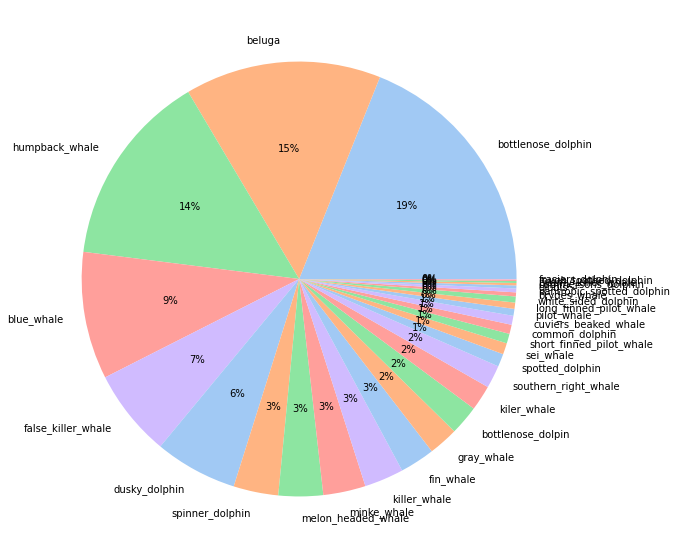

In [5]:
colors = sn.color_palette('pastel')[0:5]

plt.figure(figsize=(10, 10))
plt.pie(counts, labels = species, colors = colors, autopct='%.0f%%')
plt.show()

As we can see from the two previous cells, there is a big class imbalance in the dataset. The classes "bottlenose_dolphin", "beluga", "humpback_whale" and "blue_whale" account for more than 50% of the training samples ! It's only 5 classes out of 30 that account for this >50%, this is a serious case of class imbalance that must be addresses properly

### Column "individual_id"

In [6]:
individual, counts = np.unique(train_csv["individual_id"].values,return_counts=True)

individual = individual[np.flip(np.argsort(counts))]
counts = counts[np.flip(np.argsort(counts))]

print("Number of unique individual:", len(individual))
print()

print("id".ljust(26), "#".ljust(12), "perc".ljust(12))
print("".ljust(25,"-"), "".ljust(12,"-"), "".ljust(12,"-"))
for i, c in zip(individual, counts):
    print(f"{i}".ljust(26), f"{c}".ljust(12), f"{100.0 * c / len(train_csv):.4f}".ljust(12))

Number of unique individual: 15587

id                         #            perc        
------------------------- ------------ ------------
37c7aba965a5               400          0.7838      
114207cab555               168          0.3292      
a6e325d8e924               155          0.3037      
19fbb960f07d               154          0.3018      
c995c043c353               153          0.2998      
f195c38bcf17               146          0.2861      
ffbb4e585ff2               145          0.2841      
ce6e37904aa4               145          0.2841      
281504409737               143          0.2802      
9e89f8e28807               141          0.2763      
bc1eb2241633               141          0.2763      
b9907151f66e               140          0.2743      
c27db73f0e3b               135          0.2645      
938b7e931166               135          0.2645      
956562ff2888               131          0.2567      
4b8534134eb8               131          0.2567      
600ab1de92d

787d63c24a58               9            0.0176      
9b3494224b4e               9            0.0176      
09a99b2024af               9            0.0176      
627009b91517               9            0.0176      
e7088075f6f0               9            0.0176      
78acf56901eb               9            0.0176      
f98fd43e85f0               9            0.0176      
b5eebed8e08b               9            0.0176      
a0426f94bee5               9            0.0176      
264cec6c4bfa               9            0.0176      
a03830613b45               9            0.0176      
7c520fab410b               9            0.0176      
ace276611cba               9            0.0176      
0f0089f8174c               9            0.0176      
5393adf1a8ac               9            0.0176      
c47159d4f91b               9            0.0176      
d8494dbeeee2               9            0.0176      
476a11b38d17               9            0.0176      
573474c659ac               9            0.0176

f7ce11dbd669               5            0.0098      
0aed151b8f66               5            0.0098      
4fb297ceebe0               5            0.0098      
321a296dce52               5            0.0098      
4f68037d1913               5            0.0098      
2fc014cdd5d7               5            0.0098      
524fcec862e9               5            0.0098      
65513d143e57               5            0.0098      
267bb4e56618               5            0.0098      
b09a5778e381               5            0.0098      
3ebe73f59643               5            0.0098      
7516d7727bcb               5            0.0098      
970f76e439b2               5            0.0098      
64bb5df01cdf               5            0.0098      
4f920b45e5e1               5            0.0098      
265016a18097               5            0.0098      
7a7596c77a8f               5            0.0098      
b00554e18402               5            0.0098      
67cb8df71255               5            0.0098

e08aaca21061               3            0.0059      
aa57da33b1a9               3            0.0059      
32ed123b51f1               3            0.0059      
84395b6bb8bb               3            0.0059      
e08c22462f01               3            0.0059      
aa47a646b03a               3            0.0059      
f06f762e53f1               3            0.0059      
fa9f9a300c00               3            0.0059      
9480e3b81960               3            0.0059      
32f6cc779cd7               3            0.0059      
c0f5c7780597               3            0.0059      
5d26eef01ea5               3            0.0059      
c218d6c5b7d4               3            0.0059      
29fcb29c7189               3            0.0059      
58b23e23f449               3            0.0059      
e0a7f3a501be               3            0.0059      
2a1897d816c0               3            0.0059      
0732b927fc99               3            0.0059      
a35de19509b2               3            0.0059

eb9822954c81               3            0.0059      
17ff2949f20c               3            0.0059      
569656d38c0a               3            0.0059      
6af283e0e685               3            0.0059      
d5e15a05bb21               3            0.0059      
d5e0b1aa6132               3            0.0059      
86c6d37934dc               3            0.0059      
2c2717db9150               3            0.0059      
0abcada4d255               3            0.0059      
eb6066dff13c               3            0.0059      
5fd3352ba101               3            0.0059      
8e2dc58a2794               3            0.0059      
30c6cff9ac82               3            0.0059      
d87a62f68129               3            0.0059      
41f8f5263ece               3            0.0059      
44cbd8884745               3            0.0059      
890aa480fd80               3            0.0059      
dabd5d25e314               3            0.0059      
78460a9cfee2               3            0.0059

ac803b5b3a6d               2            0.0039      
09c85cc86519               2            0.0039      
ef476d73994c               2            0.0039      
ef38a1705d41               2            0.0039      
ac8fe2414158               2            0.0039      
3413b324ce4a               2            0.0039      
341ad863fbd6               2            0.0039      
09cc922d8c11               2            0.0039      
acc4511b9cb1               2            0.0039      
342383afa1de               2            0.0039      
3423c4a03caf               2            0.0039      
a8e43f66639f               2            0.0039      
ef2538550878               2            0.0039      
314a574f87c9               2            0.0039      
a9bca2d67b34               2            0.0039      
3359cff3c51d               2            0.0039      
f0b5272d82c5               2            0.0039      
f05480c657eb               2            0.0039      
32b92b5a90c1               2            0.0039

88d41bc45fee               2            0.0039      
46e4786e24c5               2            0.0039      
887858b82a0e               2            0.0039      
ffd3e5bda0ba               2            0.0039      
46f9f0c1b190               2            0.0039      
88a85bda290d               2            0.0039      
4697161a8890               2            0.0039      
5f995a65d3aa               2            0.0039      
46960647c419               2            0.0039      
ff95891f0378               2            0.0039      
4638f1917744               2            0.0039      
463eca816c2c               2            0.0039      
89caeb1b5906               2            0.0039      
89ca963b2576               2            0.0039      
4642c250491b               2            0.0039      
46461cacceaf               2            0.0039      
89bd5079f996               2            0.0039      
464d5c2de732               2            0.0039      
89b314384f80               2            0.0039

69512a8ba5f4               2            0.0039      
116009dd353c               2            0.0039      
71d966aa0163               2            0.0039      
c9d65b1a3b8e               2            0.0039      
e3493acc85eb               2            0.0039      
e0d11e9e98dd               2            0.0039      
2114aa4dcce0               2            0.0039      
10bf999f2fed               2            0.0039      
691128a50a57               2            0.0039      
c90ad04cd257               2            0.0039      
c907da63076b               2            0.0039      
c90609d9a644               2            0.0039      
53934fd128b8               2            0.0039      
c9017239cfdb               2            0.0039      
538554bfc6ca               2            0.0039      
c8e9b4f91d2a               2            0.0039      
72854b87134c               2            0.0039      
2194a1ae51cd               2            0.0039      
7285710c1e6d               2            0.0039

1a8a90beccf6               2            0.0039      
6aa5423a87e5               2            0.0039      
6eb326e7841d               2            0.0039      
14199fdef7eb               2            0.0039      
d3d2c030cbdc               2            0.0039      
de8c49a4ff52               2            0.0039      
6a94d2e424dd               2            0.0039      
6eb918a91b1a               2            0.0039      
d3bd867b15f1               2            0.0039      
6ecce864afb8               2            0.0039      
56246a31731a               2            0.0039      
d39d8d336468               2            0.0039      
1ac1f357430f               2            0.0039      
6aa6e8ee2436               2            0.0039      
d449cbda2335               2            0.0039      
1a71fbb72250               2            0.0039      
de26ffe3102f               2            0.0039      
148ef55f01dc               2            0.0039      
19e9d64018d0               2            0.0039

4ef495ab00ad               1            0.0020      
4f1654aa65bc               1            0.0020      
4837e7297f16               1            0.0020      
52525eed1f69               1            0.0020      
5eec744c8ff1               1            0.0020      
5ee47e6f9ae2               1            0.0020      
47157057a9ca               1            0.0020      
4cb9b57052ce               1            0.0020      
4f149c04f052               1            0.0020      
525512390e8c               1            0.0020      
5087a781db53               1            0.0020      
59c5e4f6cfac               1            0.0020      
4cbbd36d7450               1            0.0020      
5c3027367dbc               1            0.0020      
48353431237c               1            0.0020      
53005d4502f1               1            0.0020      
5086fd9e3884               1            0.0020      
4b7af71ae1a9               1            0.0020      
5304d05ea898               1            0.0020

4d4e5fe50ac1               1            0.0020      
5e033a6e55da               1            0.0020      
539541f81a32               1            0.0020      
51b3cf4eeb97               1            0.0020      
5cb3280b8a17               1            0.0020      
4a7469c201f1               1            0.0020      
4a71d81f135b               1            0.0020      
53dd0c1226ed               1            0.0020      
4d9b1c6f0e2c               1            0.0020      
517333ea7967               1            0.0020      
4da3cb359e58               1            0.0020      
4d4635537ed2               1            0.0020      
5ab313e4f50b               1            0.0020      
4dae9ad14ef8               1            0.0020      
540f1f7d284c               1            0.0020      
4a244dd1e94e               1            0.0020      
5188395f25c8               1            0.0020      
591c5e6623f4               1            0.0020      
5186ef206828               1            0.0020

1b7717c796f4               1            0.0020      
1c2bec14caad               1            0.0020      
1c6f1d92407e               1            0.0020      
1c632d2251a4               1            0.0020      
1c5ab36dd7dd               1            0.0020      
1c58370cd74d               1            0.0020      
1c466bee4282               1            0.0020      
1c36c43fd6f3               1            0.0020      
1c2c2b95dbed               1            0.0020      
1c2a956be5c5               1            0.0020      
1bf1f01ee404               1            0.0020      
1c241c50ac1d               1            0.0020      
1c22a1a2a062               1            0.0020      
1c1ae5b11081               1            0.0020      
1c1ab535993d               1            0.0020      
1c19b206ef06               1            0.0020      
1c14930aac0a               1            0.0020      
1c1381172406               1            0.0020      
1b81c81edd9d               1            0.0020

3a357444a98d               1            0.0020      
3a33d26c9a98               1            0.0020      
3a2c34bc6dd7               1            0.0020      
3a21da5350cb               1            0.0020      
3a1eb82e87fc               1            0.0020      
3a08dfeb60bd               1            0.0020      
3a00674ca909               1            0.0020      
39e18501cd9a               1            0.0020      
39fd3aa9ce0d               1            0.0020      
39f7b2c3fe02               1            0.0020      
39f4fb71b739               1            0.0020      
39f4d09f5abf               1            0.0020      
39f29ba230b6               1            0.0020      
39eaed491635               1            0.0020      
39e203842d29               1            0.0020      
3b832a72396d               1            0.0020      
3b98c2ddbbdc               1            0.0020      
3971fb50c6f4               1            0.0020      
3d341b23d9fb               1            0.0020

2736b875ccaa               1            0.0020      
2736a72c9fc2               1            0.0020      
2734ef02e617               1            0.0020      
272a2412897f               1            0.0020      
2726961cdee6               1            0.0020      
26b61c193864               1            0.0020      
26ad8281a5bb               1            0.0020      
255aee7972fb               1            0.0020      
259c5a1900b7               1            0.0020      
261758f305fb               1            0.0020      
2611ab0da8b2               1            0.0020      
2604b200a87a               1            0.0020      
25f393813dbf               1            0.0020      
25ef71dbe8d4               1            0.0020      
25b6db41b712               1            0.0020      
25a838bebd30               1            0.0020      
259602d5bc52               1            0.0020      
2626bd47a1fa               1            0.0020      
25901f0169e3               1            0.0020

c977584beebf               1            0.0020      
c877be664b13               1            0.0020      
c96c0a13cb56               1            0.0020      
c8e30835dd3c               1            0.0020      
c8cfbbf2aca7               1            0.0020      
c8ccb518f83f               1            0.0020      
c8c6dbaa46e3               1            0.0020      
c8c25a4d992d               1            0.0020      
c8c10de372b2               1            0.0020      
c8b8853ba07a               1            0.0020      
c8afafd0946b               1            0.0020      
c8ab608698fb               1            0.0020      
c8ab318c81eb               1            0.0020      
c8a46e5db9c1               1            0.0020      
c8932e36533f               1            0.0020      
c892e03ca227               1            0.0020      
c88dd42b09ed               1            0.0020      
c88cb1224033               1            0.0020      
c88996fe7638               1            0.0020

c17af9c37fdc               1            0.0020      
c16d5387d197               1            0.0020      
c16cc186cd5d               1            0.0020      
c16c881b5228               1            0.0020      
c15127bf9f4d               1            0.0020      
c20f316f3c10               1            0.0020      
c2243d4c4587               1            0.0020      
c2d30d2f27cc               1            0.0020      
c234f514a0ef               1            0.0020      
c2c0dfbbc3e8               1            0.0020      
c2a9b3d48d3b               1            0.0020      
c29f644046da               1            0.0020      
c2965a36cba0               1            0.0020      
c28f92adb7c0               1            0.0020      
c28cd51277a2               1            0.0020      
c2815586bb85               1            0.0020      
c27f0a7f4e5a               1            0.0020      
c278c125165b               1            0.0020      
c27818ad87f7               1            0.0020

feffcd013a24               1            0.0020      
fefe4d1cb116               1            0.0020      
fefcab5cb8ca               1            0.0020      
fed719387ecb               1            0.0020      
fe2abcd8689a               1            0.0020      
fe214f5328df               1            0.0020      
fe20e75d4574               1            0.0020      
fe1d59a9261b               1            0.0020      
fe1b638a74a6               1            0.0020      
fe19f4388b47               1            0.0020      
fe19a5806a95               1            0.0020      
fe1380372cbe               1            0.0020      
fe11a97716a3               1            0.0020      
fe0fa53af7a5               1            0.0020      
fe0da1400217               1            0.0020      
fe07500cd467               1            0.0020      
fe04adcb8c68               1            0.0020      
fde9e31d3991               1            0.0020      
fde1c1f89b70               1            0.0020

e9b61aba59c0               1            0.0020      
e9b3a53240c1               1            0.0020      
e9b125ca9fc5               1            0.0020      
e9b004e8f1dd               1            0.0020      
e9a3cb32c211               1            0.0020      
e9a3aff862f8               1            0.0020      
e9a1c4fb13e0               1            0.0020      
e99cc5119f1d               1            0.0020      
e99b5b647c88               1            0.0020      
e996c078e472               1            0.0020      
e9936f714416               1            0.0020      
e96ac943cbef               1            0.0020      
e969158ff00e               1            0.0020      
e95221aaa233               1            0.0020      
e9470a53dfa3               1            0.0020      
e93a1e65a926               1            0.0020      
e92b221c1e2a               1            0.0020      
e88d27eb41e2               1            0.0020      
e88b846f98da               1            0.0020

768db1da56d7               1            0.0020      
76871d177df7               1            0.0020      
76866a1fa83e               1            0.0020      
767e9b670f4f               1            0.0020      
76721a86ea2f               1            0.0020      
76668b7b9e42               1            0.0020      
765d192c0d95               1            0.0020      
76525150fbf5               1            0.0020      
7644fefcce83               1            0.0020      
7636ca1a7979               1            0.0020      
762a4fc470d2               1            0.0020      
762a25caa242               1            0.0020      
76212c42afcd               1            0.0020      
760cc91f9258               1            0.0020      
75f5a1aab09f               1            0.0020      
76a4013e2968               1            0.0020      
76a7a36d3b07               1            0.0020      
76a7a8fd6ed8               1            0.0020      
76deb62cc67d               1            0.0020

67cfe0d96391               1            0.0020      
67b209f72db5               1            0.0020      
6716350a8f3e               1            0.0020      
66f32c0fbc4e               1            0.0020      
66e9c586d0ac               1            0.0020      
66e7012dae6d               1            0.0020      
66e57adf2716               1            0.0020      
66e2fa101ab3               1            0.0020      
66db40325bcb               1            0.0020      
66d73e6417b5               1            0.0020      
66d654d1794c               1            0.0020      
66cf3e0e93de               1            0.0020      
66c83fed7958               1            0.0020      
66c3f9ab8460               1            0.0020      
66bcd305cb30               1            0.0020      
66b2b784c488               1            0.0020      
66ad55d076b7               1            0.0020      
66ab252b5dc5               1            0.0020      
66a8960f002b               1            0.0020

a1cb130de4c3               1            0.0020      
a1faa057fbb4               1            0.0020      
a1e81c33a54f               1            0.0020      
a1e6c01c1e09               1            0.0020      
a1e3410719e9               1            0.0020      
a1e147846e8d               1            0.0020      
a1de8ee17109               1            0.0020      
a1de1973bfbb               1            0.0020      
a1cdb9d4ee8b               1            0.0020      
a1bcf1397666               1            0.0020      
a1804374dded               1            0.0020      
a1b6b0a540a2               1            0.0020      
a1b2fb8849e9               1            0.0020      
a1af6860a192               1            0.0020      
a1a6ac5fed16               1            0.0020      
a1a63eb35a59               1            0.0020      
a1900ed328eb               1            0.0020      
a18ef9f290bb               1            0.0020      
a1829af5fec5               1            0.0020

88b75284e23d               1            0.0020      
88ad06354a57               1            0.0020      
88a55ef6ed55               1            0.0020      
8810b044928c               1            0.0020      
880ef5184f29               1            0.0020      
8805f279ace4               1            0.0020      
8802af079bec               1            0.0020      
87f48e2c6853               1            0.0020      
87f118161ed7               1            0.0020      
87eab4e2605b               1            0.0020      
87e91bde75f1               1            0.0020      
87e16aebca40               1            0.0020      
87da344db68f               1            0.0020      
87cf9e3c3f09               1            0.0020      
87ceaa23ddaa               1            0.0020      
87cc83e4361d               1            0.0020      
87c2832b529d               1            0.0020      
87c0cad1631a               1            0.0020      
87bd50acbf75               1            0.0020

In [7]:
# What is the number of unique individual per specie ?
for s in train_csv["species"].unique():
    tmp = train_csv[train_csv["species"] == s]
    
    print(f"{s}".ljust(26), len(tmp["individual_id"].unique()))

melon_headed_whale         1323
humpback_whale             2679
false_killer_whale         196
bottlenose_dolphin         613
beluga                     1012
minke_whale                128
fin_whale                  466
blue_whale                 2348
gray_whale                 185
southern_right_whale       549
common_dolphin             38
kiler_whale                73
pilot_whale                196
dusky_dolphin              2731
killer_whale               399
long_finned_pilot_whale    131
sei_whale                  197
spinner_dolphin            891
bottlenose_dolpin          291
cuviers_beaked_whale       183
spotted_dolphin            280
globis                     48
brydes_whale               44
commersons_dolphin         70
white_sided_dolphin        175
short_finned_pilot_whale   214
rough_toothed_dolphin      46
pantropic_spotted_dolphin  44
pygmy_killer_whale         24
frasiers_dolphin           13


The class imbalance also appears along the dimension "individual_id". There are some ids which appears 400 times, while others appear only once. This is also something to keep in mind because it can lead to performance problems

### Looking at some images

In [8]:
def show_img(n_images = 5, train_or_test = "train"):
    with ZipFile(ZIP_FILE) as z:
        filelist = z.namelist()

        i = 0
        for file in filelist:
            if i == 5:
                break
            if "%s_images/" % train_or_test in file:
                with z.open(file) as f:

                    x = tf.image.decode_jpeg(f.read())
                    x = tf.image.convert_image_dtype(x, tf.float32)
                    plt.figure()
                    if train_or_test == "train":
                        img = os.path.basename(file)
                        tmp = train_csv[train_csv["image"] == img].iloc[0]
                        plt.title("%s (%s)" % (tmp["species"], tmp["individual_id"]))
                    plt.imshow(x)
                    i += 1

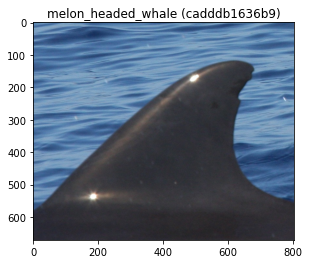

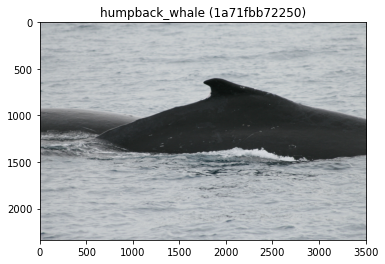

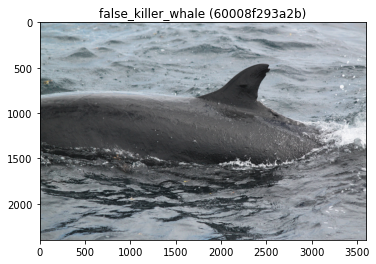

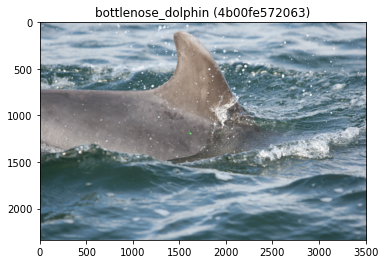

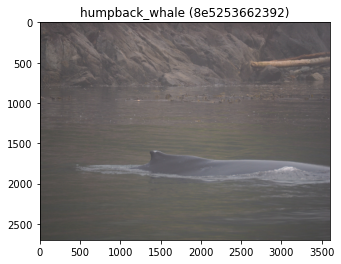

In [9]:
show_img(n_images = 5, train_or_test = "train")

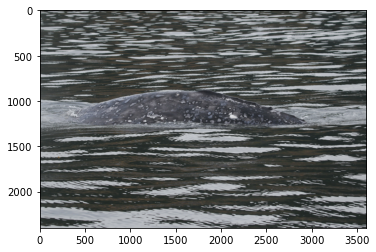

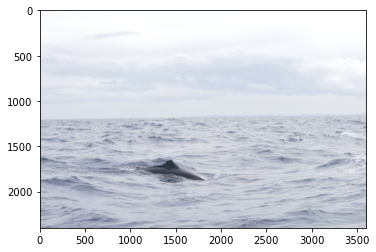

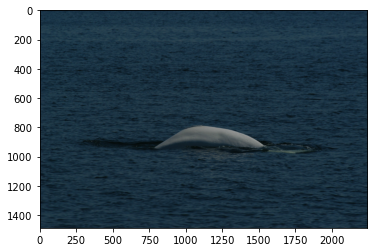

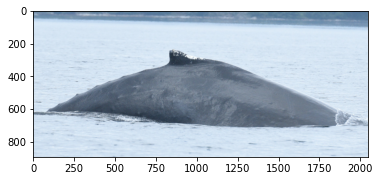

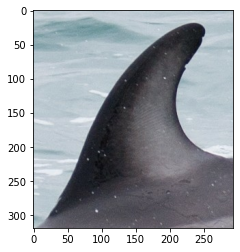

In [10]:
show_img(n_images = 5, train_or_test = "test")

There is a quite wide variety of picture types, some have a large resolution, other a lower one. Some are quite zoomed on the fin of the animal, others are mainly made of water pixels.